<a href="https://colab.research.google.com/github/vijayamurugan27/GenerativeAI/blob/main/Long_document_summary_with_advanced_techniques.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Document summarization with LLMs
Part of the Modern AI Pro Essentials program

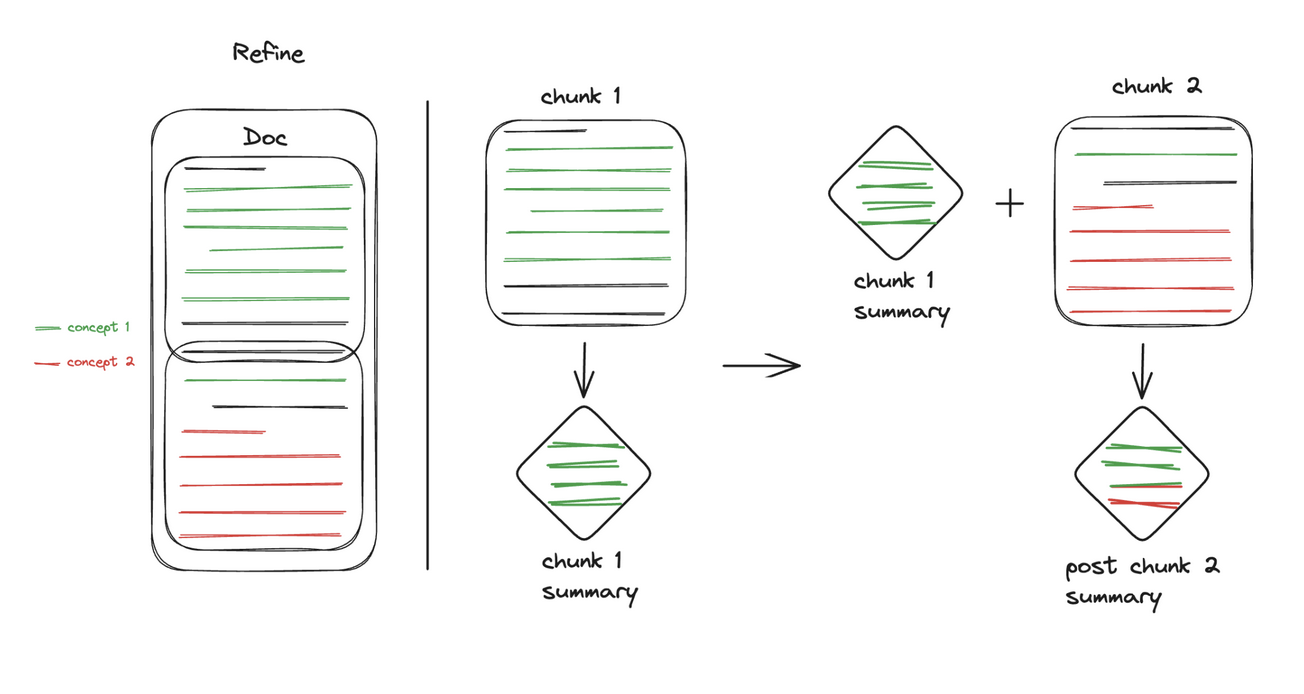

In [ ]:
# We will use a simple utility to make the text wrap properly when printing.
from IPython.display import HTML, display

def set_css():
  display(HTML('''
  <style>
    pre {
        white-space: pre-wrap;
    }
  </style>
  '''))
get_ipython().events.register('pre_run_cell', set_css)

In [ ]:
!pip install -U -q langchain_groq pypdf2 langchain langchain-community sentence-transformers chromadb
from langchain_groq import ChatGroq
from google.colab import userdata
llm_groq = ChatGroq(model_name="llama-3.1-70b-versatile", api_key=userdata.get("GROQ_API_KEY"))

## 1. Basic Summarization

In [ ]:
import os
os.environ['USER_AGENT'] = 'mitra_summarizer'
from langchain.chains.summarize import load_summarize_chain
from langchain_community.document_loaders import WebBaseLoader

In [ ]:
loader = WebBaseLoader("https://www.espncricinfo.com/team/australia-2")
docs = loader.load()
num_tokens = llm_groq.get_num_tokens(docs[0].page_content)
print (f"This page has {num_tokens} tokens in it")

This page has 2843 tokens in it


In [ ]:
chain = load_summarize_chain(llm_groq, chain_type="stuff")
summary = chain.invoke(docs)
print(summary["output_text"])

The Australian cricket team is currently ranked 1st in Tests, 2nd in ODIs, and 2nd in T20Is. They are captained by Pat Cummins in Tests and ODIs, and Mitchell Marsh in T20Is. The team has a rich history, having played their first Test match in 1877, and have won numerous titles including six ODI World Cup titles and the 2023 World Test Championship.

In recent news, Australia is currently playing a Test series against India, where they are struggling to keep up with the Indian team's strong performance. The team's head coach, Andrew McDonald, has acknowledged that Australia is "clearly well behind the game" and is looking for ways to turn the series around.

The team's top performers in the last year include Travis Head, Marnus Labuschagne, and Pat Cummins in ODIs, and Mitchell Marsh, Usman Khawaja, and Steven Smith in Tests and T20Is.


## 2. Larger summarization with Map Reduce

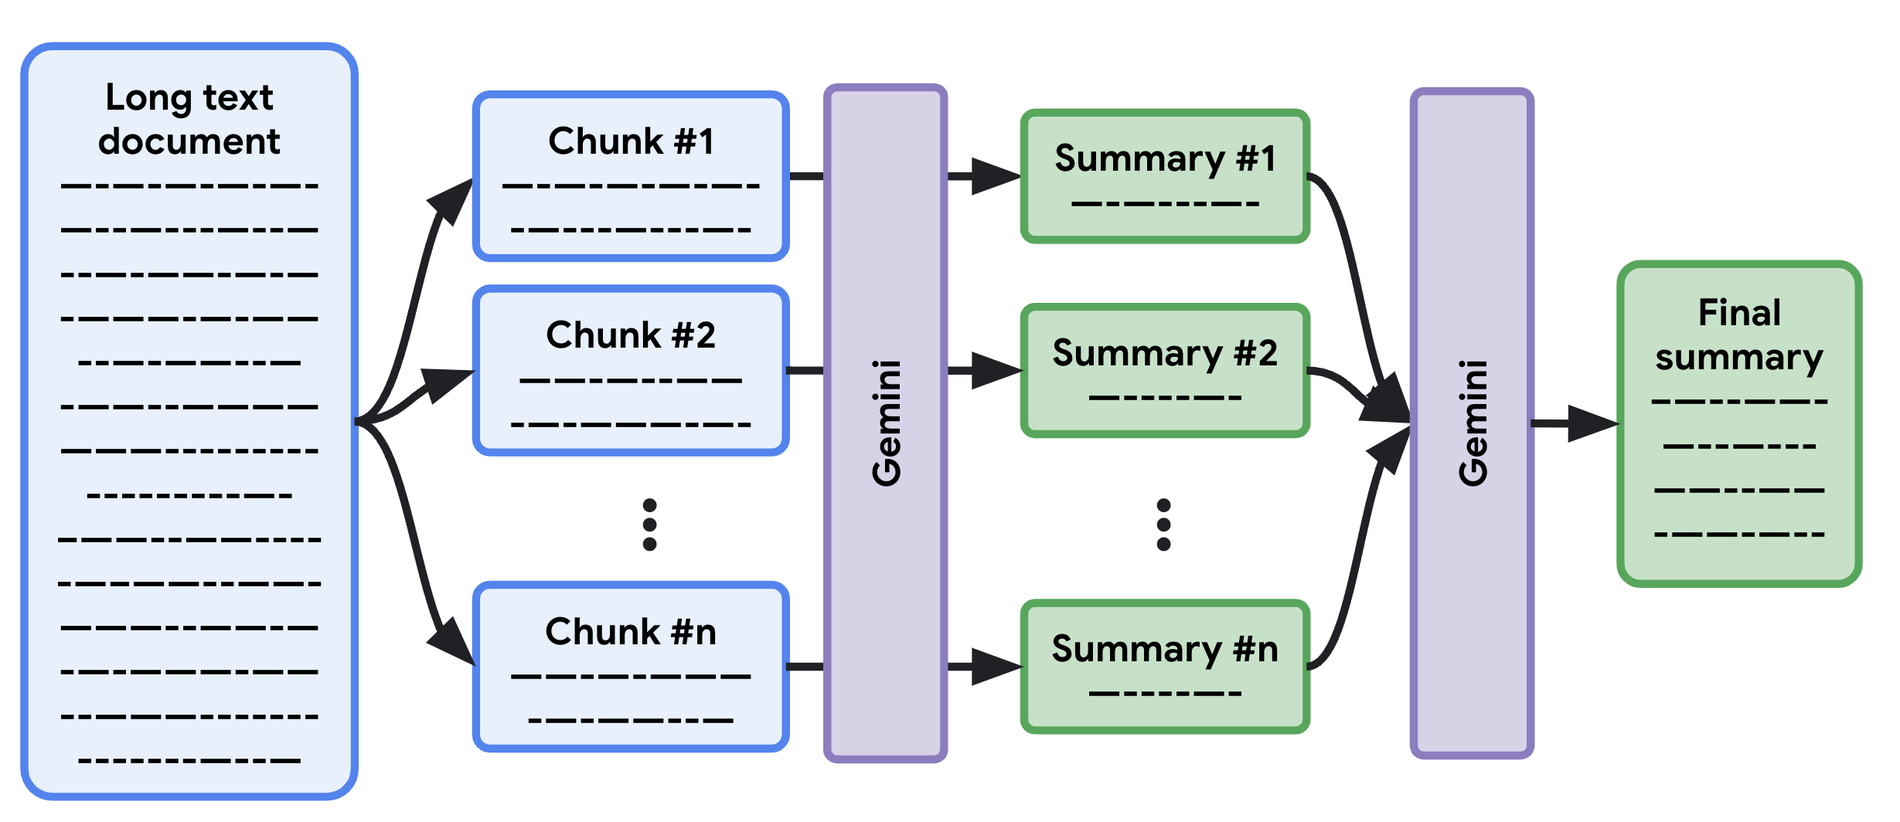

In [ ]:
loader = WebBaseLoader("https://www.whitehouse.gov/state-of-the-union-2024/")
docs = loader.load()
num_tokens = llm_groq.get_num_tokens(docs[0].page_content)
print (f"This page has {num_tokens} tokens in it")

This page has 22862 tokens in it


In [ ]:
chain = load_summarize_chain(llm_groq, chain_type="map_reduce")
summary = chain.invoke(docs)
print(summary["output_text"])

APIStatusError: Error code: 413 - {'error': {'message': 'Request too large for model `llama-3.1-70b-versatile` in organization `org_01hv9kswtje4783vhz2vyx7emk` on tokens per minute (TPM): Limit 6000, Requested 18764, please reduce your message size and try again. Visit https://console.groq.com/docs/rate-limits for more information.', 'type': 'tokens', 'code': 'rate_limit_exceeded'}}

## 3. Cluster based summarization
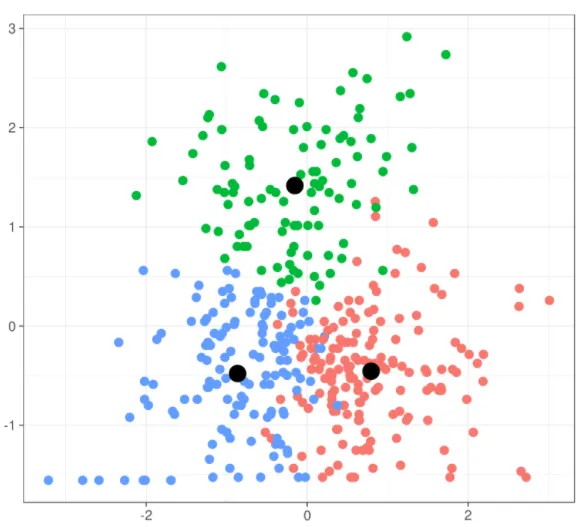

In [ ]:
import requests
from io import BytesIO
from PyPDF2 import PdfReader

In [ ]:
# Download the PDF
response = requests.get("https://reports.shell.com/annual-report/2023/_assets/downloads/shell-annual-report-2023.pdf")
response.raise_for_status()  # Check if the request was successful

# Read the PDF with PyPDF2
pdf_file = BytesIO(response.content)
reader = PdfReader(pdf_file)

text = ""

for page in reader.pages:
    text += page.extract_text()

text

'Annual Report and Accounts for the year ended December 31, 2023 Shell plc\nShell plc\n#PoweringProgress\nAnnual Report  \nand Accounts\nFor the year ended December 31, 2023Contents\nIntroduction\niii Terms and abbreviations\nStrategic Report2 Chair\'s message\n4 Chief Executive Officer\'s review\n6 Powering Progress strategy\n6 Who we are \n7 Our strategy\n10 How we create value \n12Progress against our longer-term \nbusiness\xa0targets \n13 Outlook for 2024 and beyond\n14 Risk factors\n29 Performance in the year\n29 Performance indicators\n31 Generating shareholder value\n32 Group results\n34 Financial framework\n38 Market overview\n41 Integrated Gas\n47 Upstream\n55 Oil and gas information\n63 Marketing\n68 Chemicals and Products\n75 Renewables and Energy Solutions\n79 Corporate\n81 Other central activities\n82 Our journey to net zero\n83 Introduction\n85 Governance of climate-related risks and opportunities\n89 Energy transition strategy\n100 Climate risk management\n103 Climate-re

In [ ]:
num_tokens = llm_groq.get_num_tokens(text)

print (f"This report has {num_tokens} tokens in it")

This report has 424007 tokens in it


### Fist we will do some visualization on this document

In [ ]:
import re
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt
def display_word_cloud(top_100_words):
  wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(dict(top_100_words))

  plt.figure(figsize=(10, 5))
  plt.imshow(wordcloud, interpolation='bilinear')
  plt.axis('off')
  plt.show()

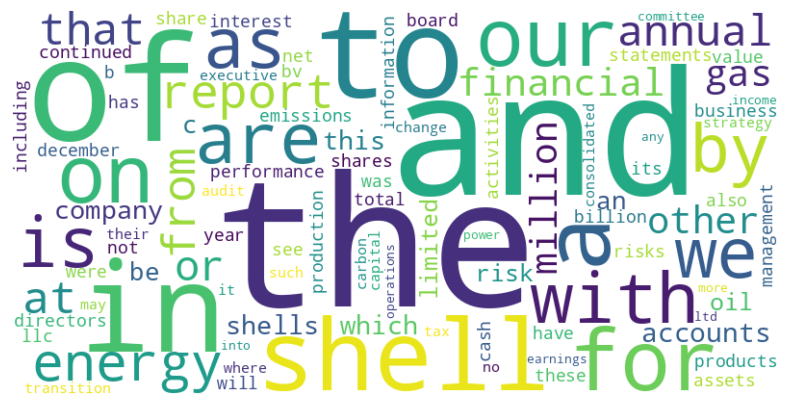

In [ ]:
text = re.sub(r'[^a-zA-Z\s]', '', text)
text = text.lower()
words = text.split()
word_counts = Counter(words)
top_100_words = word_counts.most_common(100)

display_word_cloud(top_100_words)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


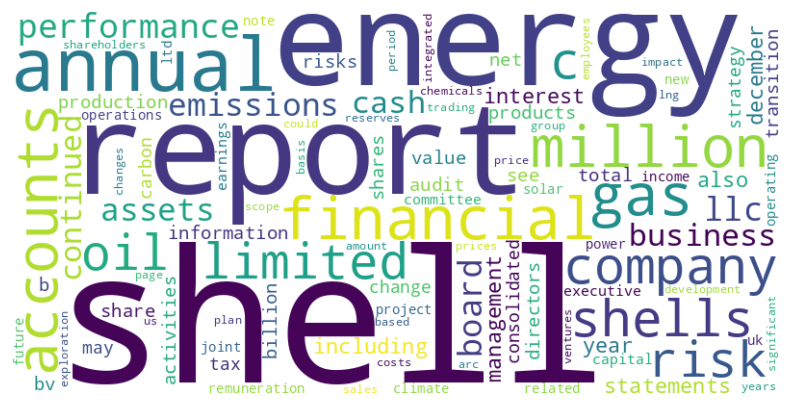

In [ ]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

stop_words = set(stopwords.words('english'))

# Filter out stop words from your list of words
filtered_words = [word for word in words if word not in stop_words]
word_counts_filtered = Counter(filtered_words)

# If you still want to limit it to the top 100 words
top_100_words_filtered = word_counts_filtered.most_common(100)

display_word_cloud(top_100_words_filtered)

In [ ]:
import nltk
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


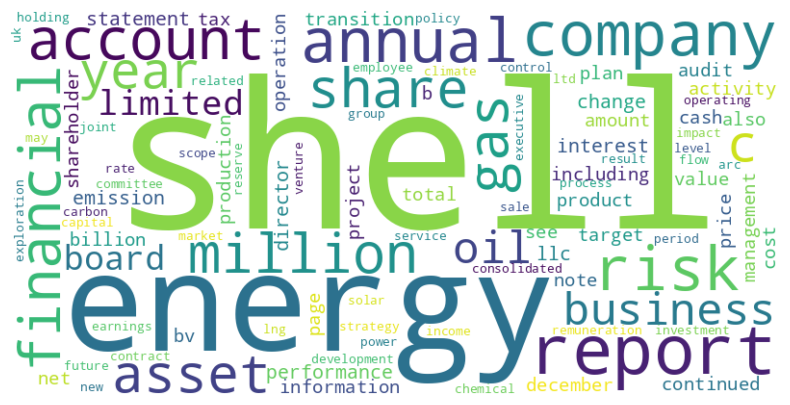

In [ ]:
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('punkt')

from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from collections import Counter

# Initialize the lemmatizer
lemmatizer = WordNetLemmatizer()
tokens = word_tokenize(text)  # Tokenize the text
stop_words = set(stopwords.words('english'))

# Lemmatize tokens and remove stop words
lemmatized_tokens = [lemmatizer.lemmatize(token) for token in tokens if token not in stop_words and token.isalpha()]

# Recount words
word_counts = Counter(lemmatized_tokens)

# Extract the top 100 words
top_100_words_lemmatized = word_counts.most_common(100)
display_word_cloud(top_100_words_lemmatized)

### Here comes document splitting

In [ ]:
from langchain.text_splitter import RecursiveCharacterTextSplitter

text_splitter = RecursiveCharacterTextSplitter(separators=["\n\n", "\n", "\t"], chunk_size=2500, chunk_overlap=500)

docs = text_splitter.create_documents([text])

num_documents = len(docs)

print (f"Now our report is split up into {num_documents} documents")

Now our report is split up into 886 documents


### The embedding is going to take a loooong time!

In [ ]:
from langchain.embeddings import HuggingFaceEmbeddings
embeddings = HuggingFaceEmbeddings(model_name="sentence-transformers/all-mpnet-base-v2", model_kwargs={"device": "cpu"})

vectors = embeddings.embed_documents([x.page_content for x in docs])

<ipython-input-18-ea04b861bbc5>:2: LangChainDeprecationWarning: The class `HuggingFaceEmbeddings` was deprecated in LangChain 0.2.2 and will be removed in 1.0. An updated version of the class exists in the :class:`~langchain-huggingface package and should be used instead. To use it run `pip install -U :class:`~langchain-huggingface` and import as `from :class:`~langchain_huggingface import HuggingFaceEmbeddings``.
  embeddings = HuggingFaceEmbeddings(model_name="sentence-transformers/all-mpnet-base-v2", model_kwargs={"device": "cpu"})


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.6k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/571 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/438M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/363 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [ ]:
#Lets cluster our results to find beautiful themes
from sklearn.cluster import KMeans
num_clusters = 11

kmeans = KMeans(n_clusters=num_clusters, random_state=42).fit(vectors)

print(kmeans.labels_)

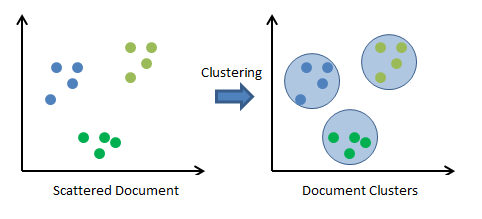

In [ ]:
# Find the closest embeddings to the centroids
import numpy as np

# Create an empty list that will hold your closest points
closest_indices = []

# Loop through the number of clusters you have
for i in range(num_clusters):

    # Get the list of distances from that particular cluster center
    distances = np.linalg.norm(vectors - kmeans.cluster_centers_[i], axis=1)

    # Find the list position of the closest one (using argmin to find the smallest distance)
    closest_index = np.argmin(distances)

    # Append that position to your closest indices list
    closest_indices.append(closest_index)

selected_indices = sorted(closest_indices)
selected_indices

[9, 218, 371, 412, 480, 512, 527, 655, 693, 721, 817]

In [ ]:
selected_docs = [docs[doc] for doc in selected_indices]

for i, doc in enumerate(selected_docs):
  print("Chunk: ",i,": ",doc.page_content[:150])

Chunk:  0 :  shell annual report and accounts we will deliver more value 
for our shareholders our 
customers and wider society with less emissions
wael sawan 
chi
Chunk:  1 :  shell annual report and accounts key metrics we use to track progress against our energy transition 
strategy are the nci of our portfolio and our abs
Chunk:  2 :  the information provided within these reports further supports the boards 
annual review of the effectiveness of the groups system of risk management 
Chunk:  3 :  shell annual report and accounts  external auditor
of arc time and activities
 activities performed frequency
external audit
review and approve the en
Chunk:  4 :  vested shares from incentive plans including bonus and ltip shares subject to holding period count towards the requirement the remco monitors individu
Chunk:  5 :  shell annual report and accounts risk management 
as outlined above risk management is a key component of the improvement cycle which emphasises its i
Chunk:  6 :  she

In [ ]:
aggregagate_doc = "\n".join([doc.page_content for doc in selected_docs])
print(f"These selected parts  have {llm_groq.get_num_tokens(aggregagate_doc)} tokens in it")

These selected parts  have 5998 tokens in it


In [ ]:
from langchain import PromptTemplate
map_prompt = """
You will be given a single passage of a report. This section will be enclosed in triple backticks (```)
Your goal is to give a summary of this section so that a reader will have a full understanding of what happened.
Your response should be detailed enough to fully encompass what was said in the passage.

```{text}```
FULL SUMMARY:
"""
map_prompt_template = PromptTemplate(template=map_prompt, input_variables=["text"])

map_chain = load_summarize_chain(llm=llm_groq,
                             chain_type="stuff",
                             prompt=map_prompt_template)

In [ ]:
# Make an empty list to hold your summaries
summary_list = []

# Loop through a range of the lenght of your selected docs
for i, doc in enumerate(selected_docs):

    # Go get a summary of the chunk
    chunk_summary = map_chain.run([doc])

    # Append that summary to your list
    summary_list.append(chunk_summary)

    print (f"Summary #{i} (chunk #{selected_indices[i]}) - Preview: {chunk_summary[:500]} \n")

summaries = "\n".join(summary_list)

<ipython-input-25-00d56827fb6f>:8: LangChainDeprecationWarning: The method `Chain.run` was deprecated in langchain 0.1.0 and will be removed in 1.0. Use :meth:`~invoke` instead.
  chunk_summary = map_chain.run([doc])


Summary #0 (chunk #9) - Preview: Wael Sawan, Shell's Chief Executive Officer, addressed the company's annual report and accounts, expressing his hope for an end to the ongoing Russia-Ukraine war and other regional conflicts. Despite these challenges, Shell remains committed to a balanced energy transition that prioritizes secure, affordable energy supplies while building a clean energy system for the future. The company acknowledges the progress made in the energy sector, with record growth in renewable power and increasing ado 

Summary #1 (chunk #218) - Preview: The passage discusses Shell's annual report and accounts, focusing on the key metrics used to track progress against their energy transition strategy. These metrics include the Net Carbon Intensity (NCI) of their portfolio, absolute emissions, and additional metrics related to resilience against climate-related risks and opportunities.

In terms of absolute emissions, Shell's total combined Scope 1 and 2 absolute greenhouse g

In [ ]:
# Convert it back to a document
from langchain.schema import Document
summaries = Document(page_content=summaries)

print (f"Your total summary has {llm_groq.get_num_tokens(summaries.page_content)} tokens")

Your total summary has 4214 tokens


In [ ]:
print(summaries.page_content)

Wael Sawan, Shell's Chief Executive Officer, addressed the company's annual report and accounts, expressing his hope for an end to the ongoing Russia-Ukraine war and other regional conflicts. Despite these challenges, Shell remains committed to a balanced energy transition that prioritizes secure, affordable energy supplies while building a clean energy system for the future. The company acknowledges the progress made in the energy sector, with record growth in renewable power and increasing adoption of electric vehicles.

Shell's strategy, "Powering Progress," aims to transform the company into a net-zero emissions energy business by 2050. The company will focus on performance, discipline, and simplification to deliver more value to shareholders, customers, and society while reducing emissions. This goal will be guided by the company's financial and climate targets.

In the past year, Shell achieved several notable milestones. The QGC project in Australia achieved its highest-ever liq

## 4. Graph based query focused summarization

In [ ]:
# Inspired from: https://dev.to/stephenc222/implementing-graphrag-for-query-focused-summarization-47ib
!pip install -q -U networkx leidenalg cdlib python-igraph arxiv pymupdf
import networkx as nx
from cdlib import algorithms

In [ ]:
from langchain_community.document_loaders import ArxivLoader
loader = ArxivLoader(
    query="RAG techniques",
    load_max_docs=1)
docs = loader.load()
docs[0]

In [ ]:
# For now let's ignore meta data and just take the raw content
aggregate_text = "\n".join([doc.page_content for doc in docs])
print(f"The papers have has {llm_groq.get_num_tokens(aggregate_text)} tokens in it")


In [ ]:
docs = text_splitter.create_documents([aggregate_text])
print (f"Now our paper collection is split up into {len(docs)} documents")

In [ ]:
import time
elements = []

for index, chunk in enumerate(docs):
  chunk = chunk.page_content
  print("Chunk: ",index,": ",chunk[:150])
  elements.append(llm_groq.invoke(f"Extract entities and relationships from the following text: {chunk}").content)
  time.sleep(2) # Don't overload Groq

elements

In [ ]:
summaries = []
for el in elements:
  summaries.append(llm_groq.invoke(f"Summarize the following entities and relationships in a structured format. Use \"->\" to represent relationships, after the \"Relationships:\" word: {el}").content)
  time.sleep(2) # Don't overload Groq

summaries

In [ ]:
def build_graph_from_summaries(summaries):
    G = nx.Graph()
    for summary in summaries:
        lines = summary.split("\n")
        entities_section = False
        relationships_section = False
        entities = []
        for line in lines:
            if line.startswith("### Entities:") or line.startswith("**Entities:**"):
                entities_section = True
                relationships_section = False
                continue
            elif line.startswith("### Relationships:") or line.startswith("**Relationships:**"):
                entities_section = False
                relationships_section = True
                continue
            if entities_section and line.strip():
                entity = line.split(".", 1)[1].strip() if line[0].isdigit() and line[1] == "." else line.strip()
                entity = entity.replace("**", "")
                entities.append(entity)
                G.add_node(entity)
            elif relationships_section and line.strip():
                parts = line.split("->")
                if len(parts) >= 2:
                    source = parts[0].strip()
                    target = parts[-1].strip()
                    relation = " -> ".join(parts[1:-1]).strip()
                    G.add_edge(source, target, label=relation)
    return G

graph = build_graph_from_summaries(summaries)

In [ ]:
print(f"The number of nodes in the graph is {graph.number_of_nodes()} and number of edges is {graph.number_of_edges()}")

In [ ]:
# Draw the graph
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 12))
nx.draw(graph, with_labels=True, node_color="lightblue", node_size=300, font_size=8)
plt.title("Graph of Entities and Relationships")
plt.show()

In [ ]:
def detect_communities(graph):
    communities = []
    for component in nx.connected_components(graph):
        subgraph = graph.subgraph(component)
        if len(subgraph.nodes) > 1:
            try:
                sub_communities = algorithms.leiden(subgraph)
                for community in sub_communities.communities:
                    communities.append(list(community))
            except Exception as e:
                print(f"Error processing community: {e}")
        else:
            communities.append(list(subgraph.nodes))
    return communities

communities = detect_communities(graph)

In [ ]:
community_summaries = []
for community in communities:
  subgraph = graph.subgraph(community)
  nodes = list(subgraph.nodes)
  edges = list(subgraph.edges(data=True))
  description = "Entities: " + ", ".join(nodes) + "\nRelationships: "
  relationships = []

  for edge in edges:
      relationships.append(f"{edge[0]} -> {edge[2]['label']} -> {edge[1]}")
  description += ", ".join(relationships)

  community_summaries.append(llm_groq.invoke(f"Summarize the following community of entities and relationships: {description}").content)
  time.sleep(5) # Don't overload Groq

community_summaries

In [ ]:
query = "What is the key theme in these papers?"
intermediate_answers = []

for summary in community_summaries:
  intermediate_answers.append(llm_groq.invoke(f"Answer this query: {query} based on the provided summary: {summary}").content)

intermediate_answers

In [ ]:
intermediate_answers

In [ ]:
print(llm_groq.invoke(f"Find the final answer from these intermediate answers and be detailed: {intermediate_answers}").content)